In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#Creating dataframe
df = pd.read_excel(r'D:\Data_Science\Data_Challenge\astra-digital\churn-dataset.xlsx')

#Check column data types
df.dtypes

Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Int'l Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
dtype: object

In [43]:
#Check missing value
df.isnull().sum()

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Int'l Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
dtype: int64

Terlihat bahwa tipe data setiap kolom bernilai numerik dan tidak ada missing data. 

In [44]:
#Get column names
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge'],
      dtype='object')

In [45]:
#Changing column names
df.columns = ['account_length', 'vmail_message', 'day_mins', 'eve_mins', 'night_mins',
       'intl_mins', 'custserv_calls', 'churn', 'intl_plan', 'day_calls',
       'day_charge', 'eve_calls', 'eve_charge', 'night_calls', 'night_charge',
       'intl_calls', 'intl_charge']

df.head(10)

,account_length,vmail_message,day_mins,eve_mins,night_mins,intl_mins,custserv_calls,churn,intl_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,84,43.96,111,18.87,97,14.69,5,3.02


In [46]:
#Labeling y and x as features
y = df.churn
lists = ['churn']
x = df.drop(lists, axis = 1)
x.head(10)

,account_length,vmail_message,day_mins,eve_mins,night_mins,intl_mins,custserv_calls,intl_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge
0,128,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,1,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,1,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,1,84,43.96,111,18.87,97,14.69,5,3.02


Numbers of staying customer:  2850
Numbers of leaving customer:  483


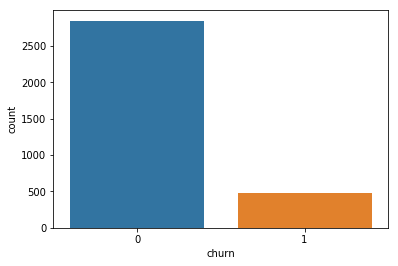

In [47]:
# Plotting customer churn
ax = sns.countplot(y, label = "Count")
no,yes = y.value_counts()
print('Numbers of staying customer: ', no)
print('Numbers of leaving customer: ', yes)

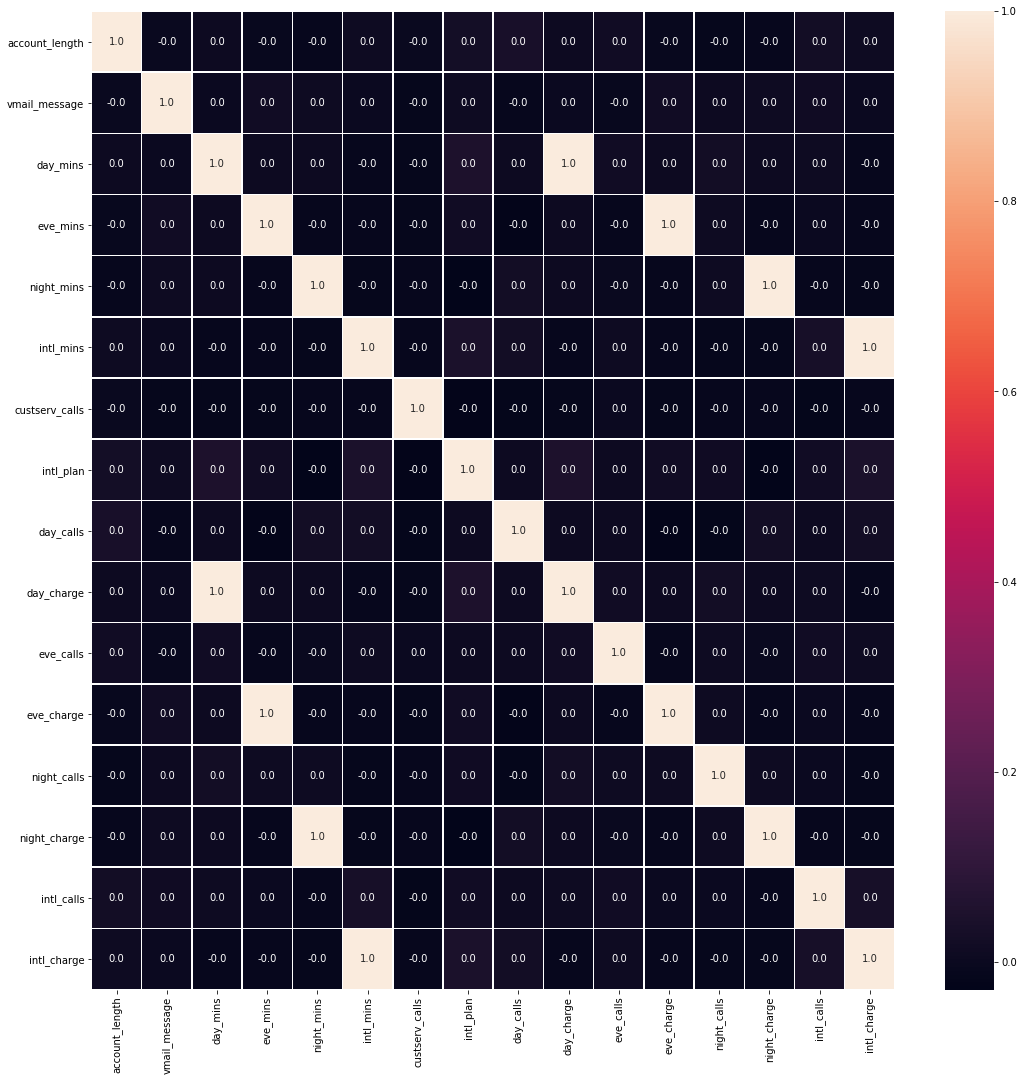

In [48]:
#Correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Dari tabel korelasi, telihat bahwa day_mins berkorelasi dengan day_charge, eve_mins berkorelasi dengan eve_charge, night_mins berkorelasi dengan night_charge, dan intl_mins berkorelasi dengan intl_charge. Dengan demikian dipilih salah satu di antara dua feature yang saling berkorelasi yaitu day_charge, eve_charge, night_charge, dan intl_charge.

In [49]:
#New drop list
drop_list1 = ['day_mins', 'eve_mins', 'night_mins','intl_mins']
x_1 = x.drop(drop_list1, axis = 1)
x_1.head()

,account_length,vmail_message,custserv_calls,intl_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge
0,128,25,1,0,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,1,0,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,2,1,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,3,1,113,28.34,122,12.61,121,8.41,3,2.73


In [50]:
#Removing correlated features from data frame
df = df.drop(drop_list1, axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9720F9F60>,
      dtype=object)

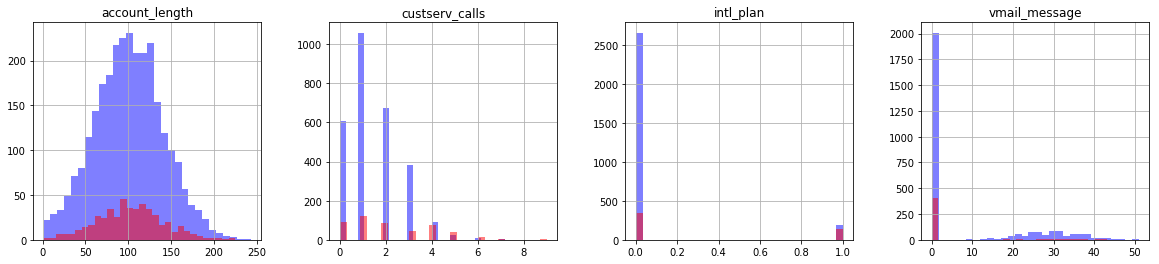

In [51]:
numerical_features1 = ['account_length', 'vmail_message', 'custserv_calls', 'intl_plan']

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
df[df.churn == 0][numerical_features1].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.churn == 1][numerical_features1].hist(bins=30, color="red", alpha=0.5, ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C971B0E518>,
      dtype=object)

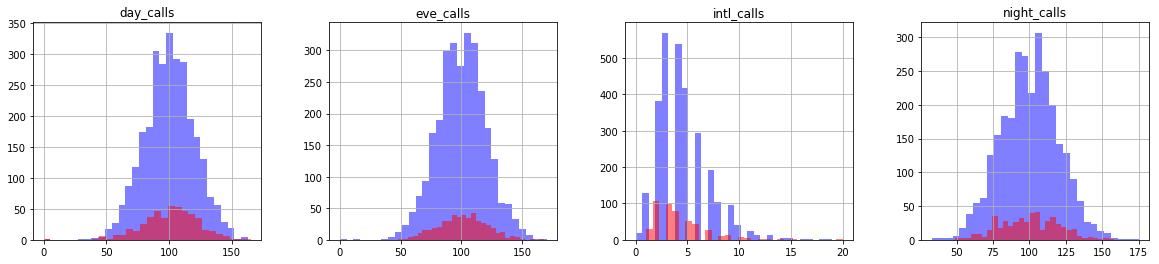

In [52]:
numerical_features2 = ['day_calls', 'eve_calls', 'night_calls', 'intl_calls']

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
df[df.churn == 0][numerical_features2].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.churn == 1][numerical_features2].hist(bins=30, color="red", alpha=0.5, ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9725BD438>,
      dtype=object)

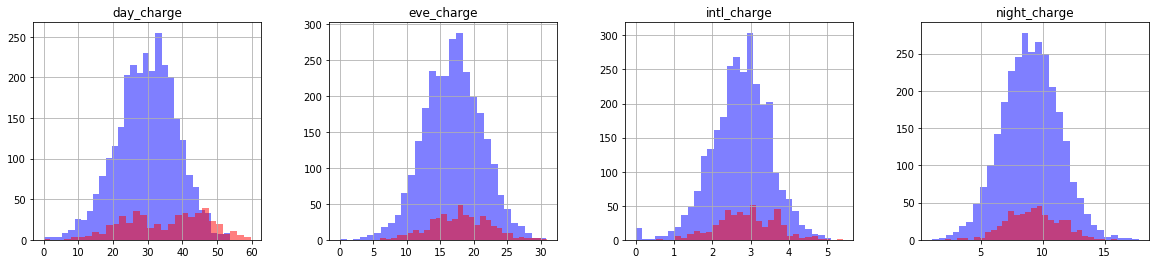

In [53]:
numerical_features3 = ['day_charge', 'eve_charge', 'night_charge', 'intl_charge']

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
df[df.churn == 0][numerical_features3].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.churn == 1][numerical_features3].hist(bins=30, color="red", alpha=0.5, ax=ax)

In [56]:
#Split train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_1,y, test_size=0.33, random_state=54)

In [59]:
#Comparing methods
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LR()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    


LR: 0.863861 (0.017130)
LDA: 0.859833 (0.016127)
KNN: 0.862954 (0.016388)
CART: 0.914027 (0.021236)
NB: 0.845504 (0.022670)
SVM: 0.860718 (0.015487)
RF: 0.931036 (0.015668)


Accuracy:  0.9263636363636364


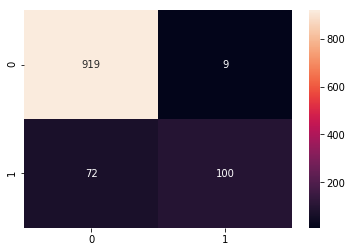

In [61]:
# Make predictions on validation dataset
rfmodel = RandomForestClassifier()
rfmodel = rfmodel.fit(x_train, y_train)
predictions = rfmodel.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd')

Feature ranking:
1. feature 5 (0.223445)
2. feature 7 (0.124862)
3. feature 2 (0.112646)
4. feature 3 (0.088568)
5. feature 11 (0.076936)
6. feature 9 (0.060958)
7. feature 4 (0.058462)
8. feature 6 (0.058249)
9. feature 0 (0.053863)
10. feature 8 (0.052035)
11. feature 10 (0.047379)
12. feature 1 (0.042596)


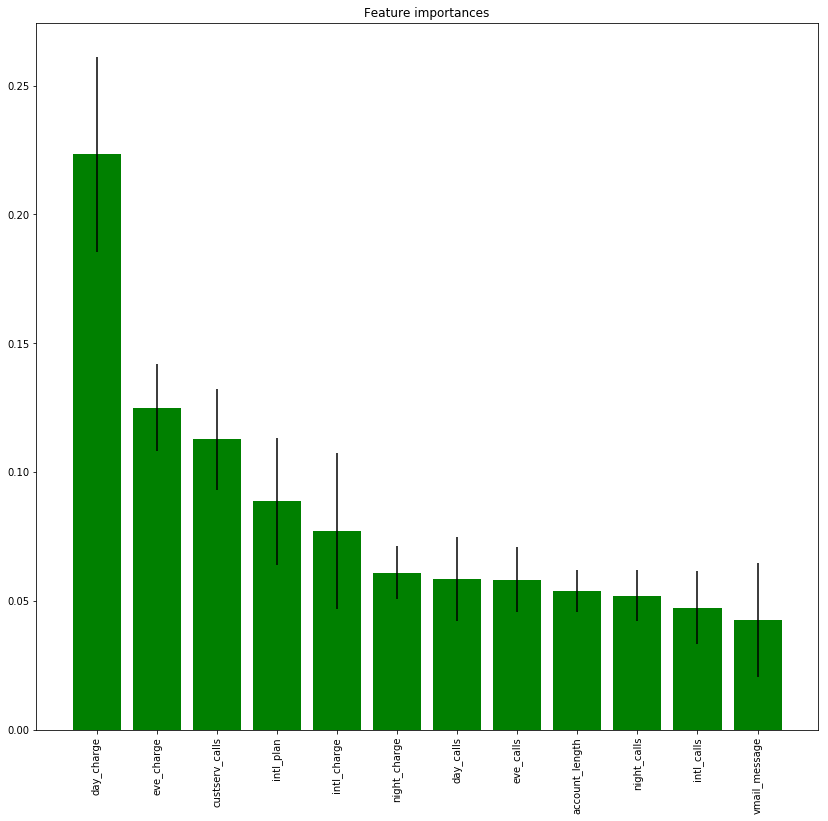

In [62]:
# Feature Importances
importances = rfmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfmodel.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()